In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame
from datetime import datetime

In [268]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

df_confirmed_primary = pd.read_csv(url_confirmed)
df_deaths_primary = pd.read_csv(url_deaths)


In [269]:
date_columns = df_confirmed_primary.columns[4:]
date_columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1143)

In [270]:
# setting Date Format
date_format = pd.to_datetime(date_columns)
date_format

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1143, freq=None)

In [271]:
# setting Date Range
range = (date_format >= '2020-02-01') & (date_format <= '2021-07-31')

In [272]:
df_confirmed = df_confirmed_primary.iloc[:, :4].join(df_confirmed_primary.iloc[:, 4:][date_columns[range]])
df_deaths = df_deaths_primary.iloc[:, :4].join(df_deaths_primary.iloc[:, 4:][date_columns[range]])

In [273]:
# Sum of confirmed cases and deaths
global_confirmed = df_confirmed.iloc[:, 4:].sum(axis=0)
global_deaths = df_deaths.iloc[:, 4:].sum(axis=0)

In [274]:
# Aggregated dataframe
global_data = pd.DataFrame({
    'Date': global_confirmed.index,
    'Confirmed Cases': global_confirmed.values,
    'Deaths': global_deaths.values
})

global_data

,Date,Confirmed Cases,Deaths
0,2/1/20,12038,260
1,2/2/20,16787,364
2,2/3/20,19887,428
3,2/4/20,23899,494
4,2/5/20,27644,566
...,...,...,...
542,7/27/21,195847033,4207766
543,7/28/21,196497116,4217888
544,7/29/21,197139985,4228154
545,7/30/21,197872339,4237757


In [275]:
# Create new 2 columns for per day confirmed cases and per day deaths.
global_data['Confirmed cases/day'] = global_data['Confirmed Cases'].diff().fillna(global_data['Confirmed Cases'])
global_data['Deaths/day'] = global_data['Deaths'].diff().fillna(global_data['Deaths'])

global_data

,Date,Confirmed Cases,Deaths,Confirmed cases/day,Deaths/day
0,2/1/20,12038,260,12038.0,260.0
1,2/2/20,16787,364,4749.0,104.0
2,2/3/20,19887,428,3100.0,64.0
3,2/4/20,23899,494,4012.0,66.0
4,2/5/20,27644,566,3745.0,72.0
...,...,...,...,...,...
542,7/27/21,195847033,4207766,606330.0,9789.0
543,7/28/21,196497116,4217888,650083.0,10122.0
544,7/29/21,197139985,4228154,642869.0,10266.0
545,7/30/21,197872339,4237757,732354.0,9603.0


In [295]:
df_AC = pd.read_csv("Air Canada.csv")
df_BoA = pd.read_csv("Bank of America.csv")
df_BGold = pd.read_csv("Barrick Gold Corporation.csv")

In [296]:
df_AC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,44.369999,45.180000,44.119999,44.779999,44.779999,1499600
1,2020-02-04,45.590000,47.250000,45.520000,46.509998,46.509998,1812500
2,2020-02-05,47.250000,48.060001,46.400002,46.700001,46.700001,1971000
3,2020-02-06,47.000000,47.130001,46.330002,46.349998,46.349998,1373700
4,2020-02-07,46.250000,46.250000,45.040001,45.459999,45.459999,1316300
...,...,...,...,...,...,...,...
371,2021-07-26,25.110001,25.650000,24.910000,25.500000,25.500000,2469400
372,2021-07-27,25.290001,25.500000,24.750000,25.180000,25.180000,1966800
373,2021-07-28,25.219999,25.530001,24.969999,24.990000,24.990000,1974600
374,2021-07-29,25.250000,25.629999,25.160000,25.250000,25.250000,2632000


In [297]:
# Keeping only stock close price
df_AC.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [279]:
df_BoA.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [280]:
df_BGold.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [281]:
df_merge1 = pd.merge(df_AC, df_BoA, on = 'Date')
df_merge1

,Date,Close_x,Close_y
0,2020-02-03,44.779999,32.970001
1,2020-02-04,46.509998,33.619999
2,2020-02-05,46.700001,34.709999
3,2020-02-06,46.349998,34.669998
4,2020-02-07,45.459999,34.610001
...,...,...,...
365,2021-07-26,25.500000,38.130001
366,2021-07-27,25.180000,37.980000
367,2021-07-28,24.990000,38.130001
368,2021-07-29,25.250000,38.680000


In [298]:
# Merge 3 stock data
df_merge2 = pd.merge(df_merge1, df_BGold, on = 'Date')
df_merge2

,Date,Close_x,Close_y,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,44.779999,32.970001,18.370001,18.450001,18.090000,18.280001,16.450218,11758500
1,2020-02-04,46.509998,33.619999,18.010000,18.150000,17.629999,18.020000,16.216240,15578600
2,2020-02-05,46.700001,34.709999,18.000000,18.170000,17.959999,18.020000,16.216240,7388300
3,2020-02-06,46.349998,34.669998,18.120001,18.490000,18.049999,18.350000,16.513205,7471800
4,2020-02-07,45.459999,34.610001,18.450001,18.559999,18.080000,18.190001,16.369223,8733600
...,...,...,...,...,...,...,...,...,...
365,2021-07-26,25.500000,38.130001,20.660000,21.049999,20.570000,20.820000,19.249645,10282500
366,2021-07-27,25.180000,37.980000,20.860001,21.059999,20.680000,20.990000,19.406822,10501600
367,2021-07-28,24.990000,38.130001,20.969999,21.370001,20.910000,21.340000,19.730423,11952500
368,2021-07-29,25.250000,38.680000,21.740000,21.990000,21.590000,21.809999,20.164970,16416200


In [299]:
# Renaming the stock close price
df_stock_data = df_merge2.rename(columns = {'Close_x': 'Close_AC', 'Close_y': 'Close_BoA', 'Close': 'Close_BGold'})
df_stock_data

,Date,Close_AC,Close_BoA,Open,High,Low,Close_BGold,Adj Close,Volume
0,2020-02-03,44.779999,32.970001,18.370001,18.450001,18.090000,18.280001,16.450218,11758500
1,2020-02-04,46.509998,33.619999,18.010000,18.150000,17.629999,18.020000,16.216240,15578600
2,2020-02-05,46.700001,34.709999,18.000000,18.170000,17.959999,18.020000,16.216240,7388300
3,2020-02-06,46.349998,34.669998,18.120001,18.490000,18.049999,18.350000,16.513205,7471800
4,2020-02-07,45.459999,34.610001,18.450001,18.559999,18.080000,18.190001,16.369223,8733600
...,...,...,...,...,...,...,...,...,...
365,2021-07-26,25.500000,38.130001,20.660000,21.049999,20.570000,20.820000,19.249645,10282500
366,2021-07-27,25.180000,37.980000,20.860001,21.059999,20.680000,20.990000,19.406822,10501600
367,2021-07-28,24.990000,38.130001,20.969999,21.370001,20.910000,21.340000,19.730423,11952500
368,2021-07-29,25.250000,38.680000,21.740000,21.990000,21.590000,21.809999,20.164970,16416200


In [284]:
date_column_stock = df_stock_data.Date
date_column_stock

0      2020-02-03
1      2020-02-04
2      2020-02-05
3      2020-02-06
4      2020-02-07
          ...    
365    2021-07-26
366    2021-07-27
367    2021-07-28
368    2021-07-29
369    2021-07-30
Name: Date, Length: 370, dtype: object

In [285]:
# setting Date Format
date_format_stock = pd.to_datetime(date_column_stock)
date_format_stock

0     2020-02-03
1     2020-02-04
2     2020-02-05
3     2020-02-06
4     2020-02-07
         ...    
365   2021-07-26
366   2021-07-27
367   2021-07-28
368   2021-07-29
369   2021-07-30
Name: Date, Length: 370, dtype: datetime64[ns]

In [300]:
# Merging the COVID data with stock data
df_aggregated = global_data.iloc[:,:].join(df_stock_data.iloc[:, 1:])
df_aggregated

,Date,Confirmed Cases,Deaths,Confirmed cases/day,Deaths/day,Close_AC,Close_BoA,Open,High,Low,Close_BGold,Adj Close,Volume
0,2/1/20,12038,260,12038.0,260.0,44.779999,32.970001,18.370001,18.450001,18.090000,18.280001,16.450218,11758500.0
1,2/2/20,16787,364,4749.0,104.0,46.509998,33.619999,18.010000,18.150000,17.629999,18.020000,16.216240,15578600.0
2,2/3/20,19887,428,3100.0,64.0,46.700001,34.709999,18.000000,18.170000,17.959999,18.020000,16.216240,7388300.0
3,2/4/20,23899,494,4012.0,66.0,46.349998,34.669998,18.120001,18.490000,18.049999,18.350000,16.513205,7471800.0
4,2/5/20,27644,566,3745.0,72.0,45.459999,34.610001,18.450001,18.559999,18.080000,18.190001,16.369223,8733600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,7/27/21,195847033,4207766,606330.0,9789.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,7/28/21,196497116,4217888,650083.0,10122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,7/29/21,197139985,4228154,642869.0,10266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,7/30/21,197872339,4237757,732354.0,9603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [301]:
#Checking missing values
missing_value = df_aggregated.isnull().sum()
missing_value

Date                     0
Confirmed Cases          0
Deaths                   0
Confirmed cases/day      0
Deaths/day               0
Close_AC               177
Close_BoA              177
Open                   177
High                   177
Low                    177
Close_BGold            177
Adj Close              177
Volume                 177
dtype: int64

In [302]:
# Dropping missing values
df_aggregated = df_aggregated.dropna()

In [303]:
#Checking missing values again
df_aggregated.isnull().sum()

Date                   0
Confirmed Cases        0
Deaths                 0
Confirmed cases/day    0
Deaths/day             0
Close_AC               0
Close_BoA              0
Open                   0
High                   0
Low                    0
Close_BGold            0
Adj Close              0
Volume                 0
dtype: int64

In [291]:
df_aggregated

,Date,Confirmed Cases,Deaths,Confirmed cases/day,Deaths/day,Close_AC,Close_BoA,Close_BGold
0,2/1/20,12038,260,12038.0,260.0,44.779999,32.970001,18.280001
1,2/2/20,16787,364,4749.0,104.0,46.509998,33.619999,18.020000
2,2/3/20,19887,428,3100.0,64.0,46.700001,34.709999,18.020000
3,2/4/20,23899,494,4012.0,66.0,46.349998,34.669998,18.350000
4,2/5/20,27644,566,3745.0,72.0,45.459999,34.610001,18.190001
...,...,...,...,...,...,...,...,...
365,1/31/21,103324692,2323435,396609.0,9549.0,25.500000,38.130001,20.820000
366,2/1/21,103767694,2333683,443002.0,10248.0,25.180000,37.980000,20.990000
367,2/2/21,104233148,2348540,465454.0,14857.0,24.990000,38.130001,21.340000
368,2/3/21,104758397,2364399,525249.0,15859.0,25.250000,38.680000,21.809999


#**Visualization**

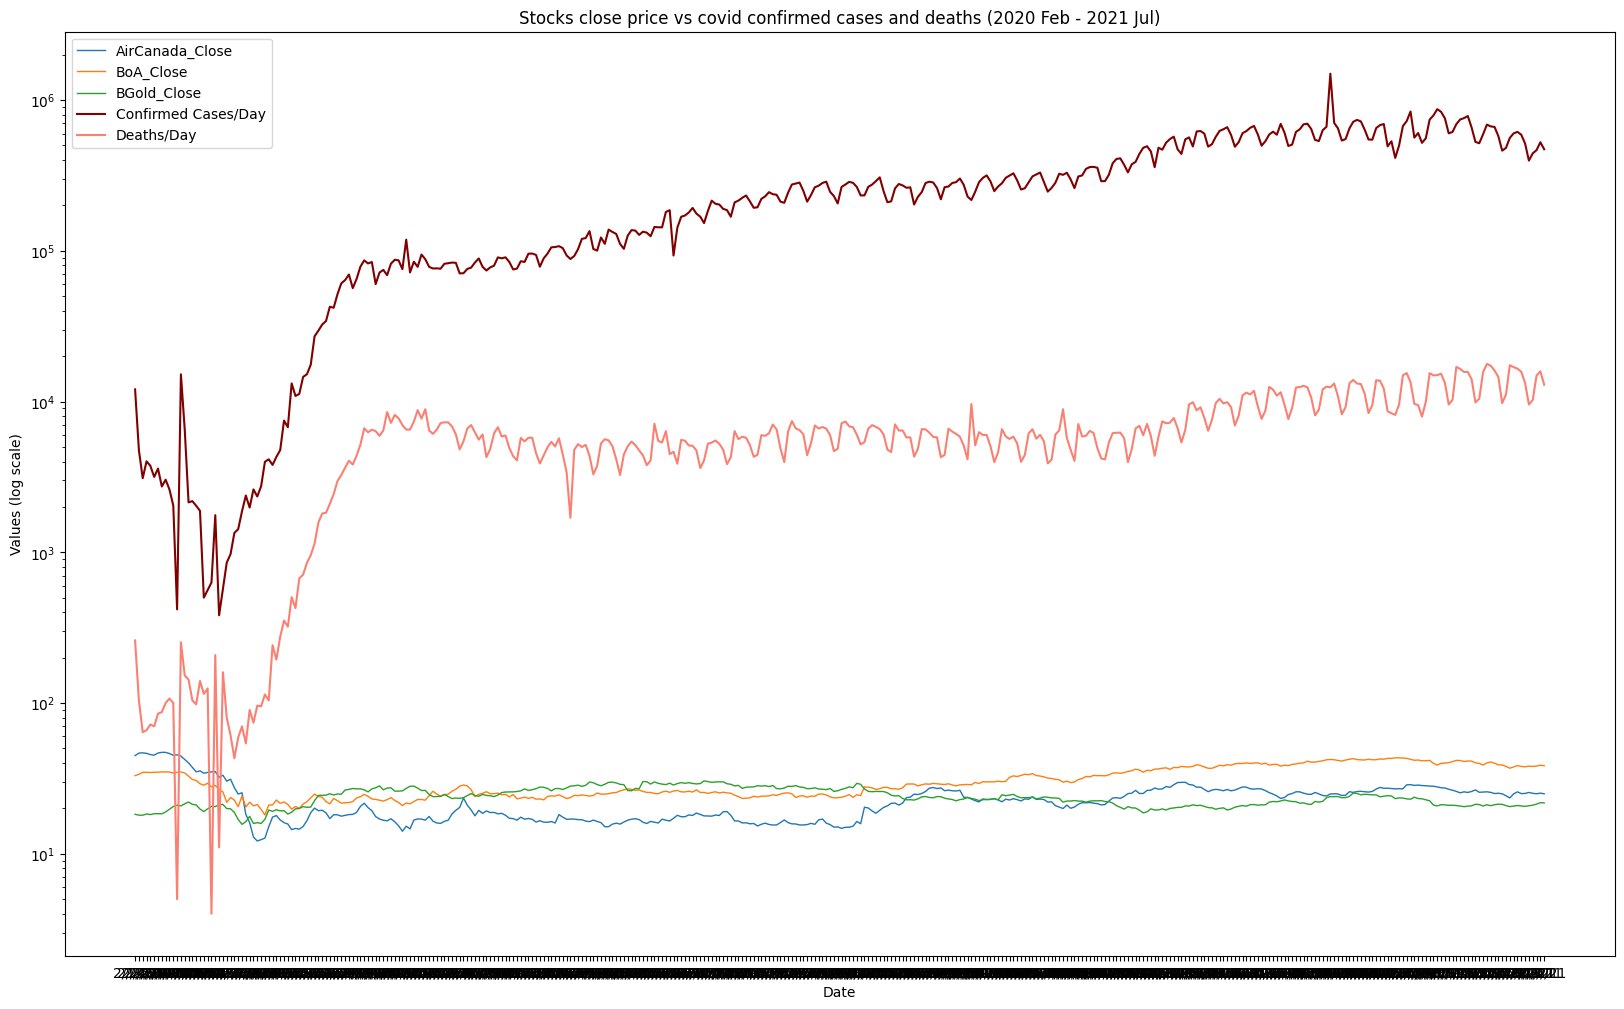

In [292]:
plt.figure(figsize=(20, 12))

plt.plot(df_aggregated['Date'], df_aggregated['Close_AC'], label='AirCanada_Close', linewidth=1)
plt.plot(df_aggregated['Date'], df_aggregated['Close_BoA'], label='BoA_Close', linewidth=1)
plt.plot(df_aggregated['Date'], df_aggregated['Close_BGold'], label='BGold_Close', linewidth=1)

# logarithmic scale for the y-axis
plt.yscale('log')


plt.plot(df_aggregated['Date'], df_aggregated['Confirmed cases/day'], label='Confirmed Cases/Day', color='maroon')
plt.plot(df_aggregated['Date'], df_aggregated['Deaths/day'], label='Deaths/Day', color='salmon')

plt.xlabel('Date')
plt.ylabel('Values (log scale)')
plt.title('Stocks close price vs covid confirmed cases and deaths (2020 Feb - 2021 Jul)')
plt.legend()
plt.show()

We have used Line Chart here to show the changes of COVID confirmed cases, deaths and stock prices with respect to time period (from Feb 2020 to Jul 2021).